In [17]:
# import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Load and read the iris dataset
iris_data = pd.read_csv(r"C:\Users\User\Downloads\iris.data.csv")

In [5]:
# Display the 1st 5 rows
iris_data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [26]:
# Assign column names for the dataset
iris_data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [27]:
# Display the 1st 5 rows with their column names
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


## Understanding the iris dataset

In [19]:
# Check basic information
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [20]:
# Check for missing values
iris_data.isnull().sum() 

# There is no missing values in the data

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [23]:
# Check for duplicate values
iris_data.duplicated().sum()

# We have 3 duplicate values in this data

3

In [24]:
# Checking the descriptive statistics
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
# Clean the data by dropping the duplicates in the dataset
iris_data.drop_duplicates(inplace=True)

In [29]:
# confirm if the duplicates have been dropped
iris_data.duplicated().sum() # All duplicates have been cleaned

0

## Exploratory Data Analysis(EDA)

Since the data has been cleaned, I will now explore to discover more insights about trends and patterns

### 1. Pie chart: 
This illustrates the proportion of each iris species

In [30]:
# Pie Chart
def plot_pie_chart(data):
    species_counts = data['species'].value_counts()
    plt.figure(figsize=(6, 6))
    species_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    plt.title('Distribution of Iris Species')
    plt.ylabel('')  # Remove the y-label for aesthetics
    plt.show()

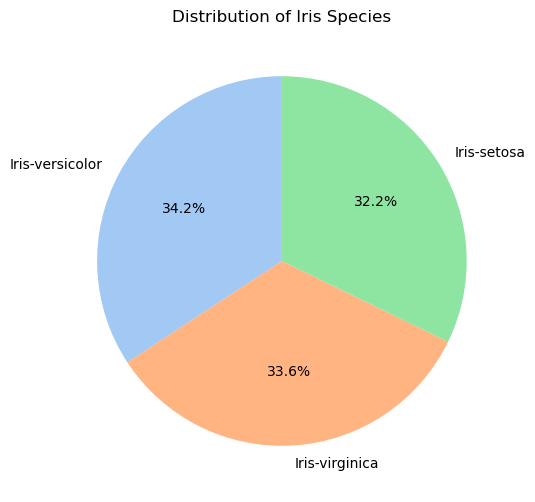

In [31]:
# Plot the function
plot_pie_chart(iris_data)

### This pie chart shows the distribution of the three Iris species in the dataset; Iris-setosa, Iris-versicolor and Iris-virginica. The proportions are almost equal of 32.2%, 34.2% and 33.6% respectively. This balance means no species dominates the dataset, making it suitable for further analysis without introducing bias. 








### 2. Scatter plot: 
This examines the relationships between features like sepal length versus pental length

In [32]:
# Scatter Plot with Linear Regression
def plot_scatter_with_fit(data, x_col, y_col):
    X = data[[x_col]].values
    y = data[y_col].values
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, label='Actual Data', alpha=0.7)
    plt.plot(X, y_pred, color='red', label='Linear Fit', linewidth=2)
    plt.title(f'Scatter Plot with Linear Fit ({x_col} vs {y_col})')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.show()

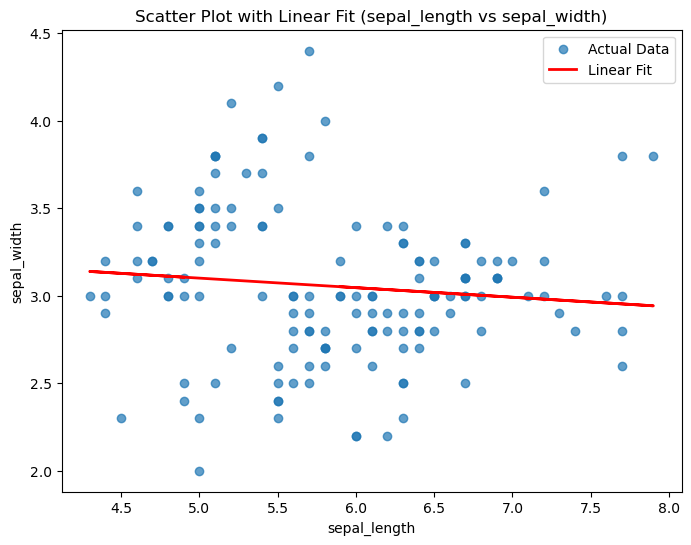

In [33]:
# Plot the function
plot_scatter_with_fit(iris_data, 'sepal_length', 'sepal_width')

### This scatter plot shows the relationship between sepal_length (x-axis) and sepal_width (y-axis) in the Iris dataset, with a red line representing a linear trend. The red line has a slight downward slope, indicating a weak negative relationship between the two variables. As sepal_length increases, sepal_width decreases slightly.The points are widely spread around the line, showing a weak connection between these features.This suggests that sepal_length alone is not a strong predictor of sepal_width, and other features may be more important for making accurate predictions.














### 3. Violin plot: 
This visualises the distribution of a feature across different species

In [34]:
# Violin Plot
def plot_violin(data, feature, category):
    plt.figure(figsize=(8, 6))
    sns.violinplot(x=category, y=feature, data=data, palette="muted")
    plt.title(f'Violin Plot of {feature} by {category}')
    plt.xlabel(category)
    plt.ylabel(feature)
    plt.show()

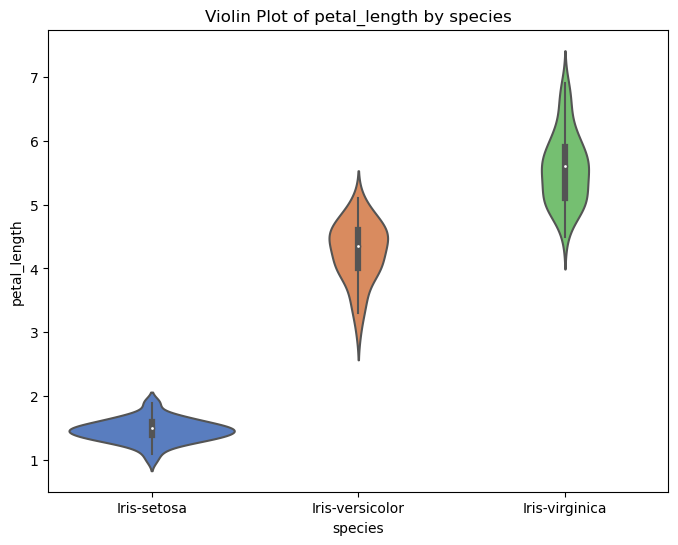

In [35]:
# Plot the function
plot_violin(iris_data, 'petal_length', 'species')

### This violin plot shows the distribution of petal_length for the three Iris species. Iris-setosa has tightly clustered petal lengths around 1.5, making it distinct from the others. Iris-versicolor has a broader, balanced range of petal lengths (around 3.0 to 5.1), with a median near 4.35. Iris-virginica has the widest range (4.5 to 7.0) and a slightly skewed distribution, centered around a median of 5.55. The non-overlapping ranges between species highlight petal_length as a key feature for distinguishing between them, especially for Iris-setosa, while there is some overlap between Iris-versicolor and Iris-virginica.

### 4. Silhouette plot: 
This evaluates the quality of clustering by showing how well each data point fits within its assigned cluster compared to other clusters.

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


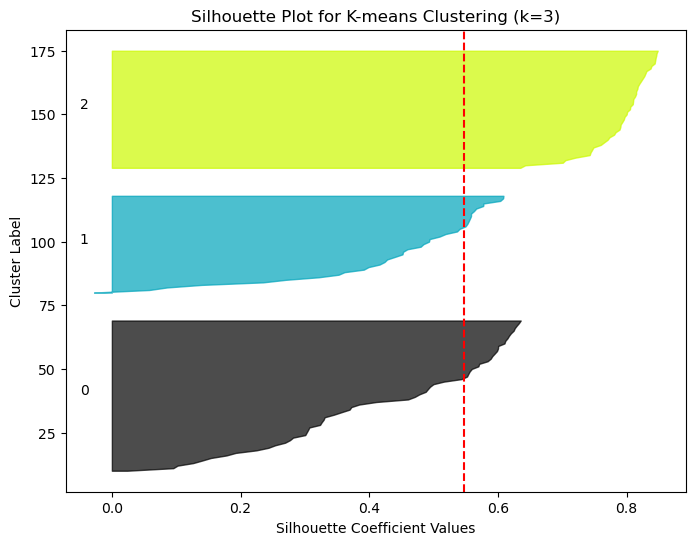

In [36]:
# Function 4: Silhouette Plot for K-means Clustering
def plot_silhouette(data, feature_cols, n_clusters=3):
    X = data[feature_cols].values
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    plt.figure(figsize=(8, 6))
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    plt.title(f"Silhouette Plot for K-means Clustering (k={n_clusters})")
    plt.xlabel("Silhouette Coefficient Values")
    plt.ylabel("Cluster Label")
    plt.show()

# Plot function
plot_silhouette(iris_data, ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], n_clusters=3)


### This silhouette plot evaluates the quality of clustering for a K-means model with k=3. Each section represents a cluster, and the width shows how well points fit within their cluster. Positive values near 1 mean points are well-separated, while values near 0 suggest points are on the boundary between clusters. All three clusters have average silhouette scores above 0.5, indicating good separation and cohesion. The red dashed line shows an overall average silhouette score of ~0.55, reflecting moderately good clustering quality. The clusters are distinct, but some variability suggests room for improvement or alternative clustering methods.